In [1]:
#all packages which will be used
import numpy as np
import pandas as pd
from scipy.io import loadmat
import time
import random

#plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib.axes import Axes

#feature selection method
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from pandas.plotting import scatter_matrix
from scipy.stats import pearsonr
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from minepy import MINE

In [2]:
X_train=pd.read_csv("C:\\Users\\hasee\\workspace\\lab\\patRecDat\\forStudents\\medData\\train_x_resample3000_boundarysel_50pergroup.csv")
y_train=pd.read_csv("C:\\Users\\hasee\\workspace\\lab\\patRecDat\\forStudents\\medData\\train_y_resample3000_boundarysel_50pergroup.csv")

In [3]:
X_train=X_train.drop(X_train[['predict_cluster']],axis=1)

In [4]:
y_train=y_train.drop(y_train[['indexofpixel','sourceofpixel','predict_cluster']],axis=1)


In [5]:
X_train

,feature0,feature1,feature2,feature3,feature4
0,0.117651,0.285209,-0.302723,-0.624315,-1.479327
1,0.147586,0.221792,-0.305188,-0.571669,-1.616350
2,1.259228,0.245014,-0.304999,-0.889284,-0.615679
3,0.977743,0.168739,-0.307814,-0.916704,-0.865166
4,0.172629,-0.177533,-0.323227,-0.817478,-1.538269
5,0.061648,-0.209621,-0.317097,-0.826345,-1.182052
6,-0.127941,-0.217494,-0.314132,-0.877895,-1.665984
7,-0.089186,-0.265669,-0.317835,-0.927722,-1.781468
8,-0.051220,-0.321122,-0.318356,-0.917181,-1.925174
9,0.040025,-0.359712,-0.315545,-0.924859,-1.777884


# 1. Filter

Filter method according to the correlation between features ,set up the threshold , make scores and select features

## 1.1 Variance selection

calcualte the variance of each features and set up threshold variance and select the target features

In [8]:
VarianceThreshold(threshold=0.7).fit_transform(X_train) #feature 1,2,3' variacne larger than 0.7

array([[ 0.28520941, -0.30272278, -0.62431527],
       [ 0.22179158, -0.30518775, -0.57166857],
       [ 0.24501414, -0.30499875, -0.88928403],
       ..., 
       [-0.04939204, -0.15048746, -0.59645052],
       [-0.07392238, -0.20351038, -0.60150487],
       [-0.0498093 , -0.16137017, -0.42723377]])

## 1.2 Correlation selection

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F55625D0B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F557052E10>]], dtype=object)

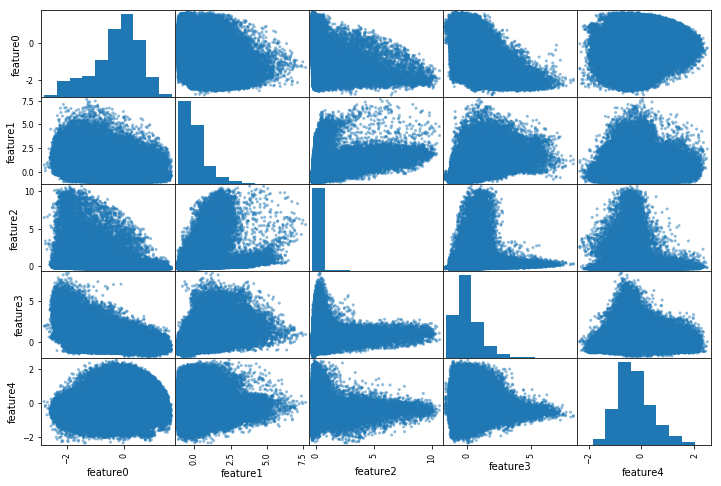

In [7]:
features=['feature0','feature1','feature2','feature3','feature4']
scatter_matrix(X_train[features],figsize=(12,8))

In [8]:
SelectKBest(lambda X, Y: np.array(map(lambda x:pearsonr(x, Y), X.T)).T, k=2).fit_transform(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'map'

## 1.3 Chi Squared selection

In [9]:
X_train_scaled=MinMaxScaler().fit_transform(X_train)
SelectKBest(chi2,k=3).fit_transform(X_train_scaled,y_train)#feature 0 and 4 are selected

array([[ 0.65234287,  0.15971101,  0.10317642],
       [ 0.65902621,  0.15249117,  0.10847818],
       [ 0.90721302,  0.15513496,  0.07649288],
       ..., 
       [ 0.82680868,  0.12161809,  0.10598253],
       [ 0.47434694,  0.11882541,  0.10547353],
       [ 0.58099452,  0.12157058,  0.12302341]])

In [6]:
X_train_scaled

array([[ 0.65234287,  0.15971101,  0.00578201,  0.10317642,  0.17655379],
       [ 0.65902621,  0.15249117,  0.00555821,  0.10847818,  0.14811877],
       [ 0.90721302,  0.15513496,  0.00557537,  0.07649288,  0.3557779 ],
       ..., 
       [ 0.82680868,  0.12161809,  0.0196035 ,  0.10598253,  0.63015833],
       [ 0.47434694,  0.11882541,  0.01478953,  0.10547353,  0.72353276],
       [ 0.58099452,  0.12157058,  0.01861545,  0.12302341,  0.43864049]])

## 1.4 Mutual Information selection

$$I(X,Y)=\sum_{x\in X}\sum_{y\in Y}p(x,y)log\frac{p(x,y)}{p(x)p(y)}$$

In [11]:
 def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)

In [13]:
    SelectKBest(lambda X, Y: np.array(map(lambda x:mic(x, Y), X.T)).T, k=2).fit_transform(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'map'

# 1.5 plot the class

In [13]:
X_train_all=pd.concat([X_train,y_train],axis=1)

In [15]:
X_train_1=X_train_all.loc[X_train_all['label']==1.0]

In [17]:
X_train_1.shape

(199249, 6)

In [18]:
X_train_2=X_train_all.loc[X_train_all['label']==2.0]
X_train_2.shape

(49203, 6)

In [39]:
def plot_label(feature1,feature2,X_train_1,X_train_2):
    feature_1="feature"+str(feature1)
    feature_2="feature"+str(feature2)
    
    plt.figure(figsize=(14,8))
    plt.title("the plot of "+feature_1+" and "+feature_2,fontsize=30)
    plt.scatter(X_train_1[feature_1],X_train_1[feature_2],c='r',label="class 1")
    plt.scatter(X_train_2[feature_1],X_train_2[feature_2],c='b',label="class 2")
    plt.legend()
    plt.show()
    

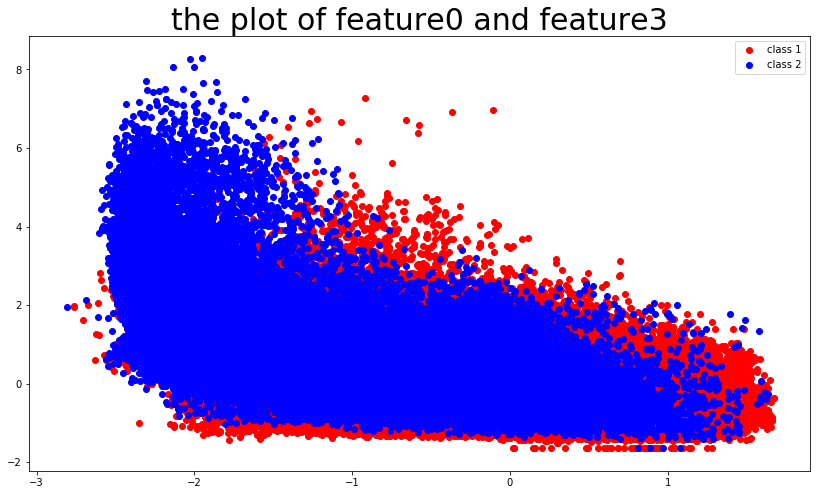

In [40]:
plot_label(0,3,X_train_1,X_train_2)

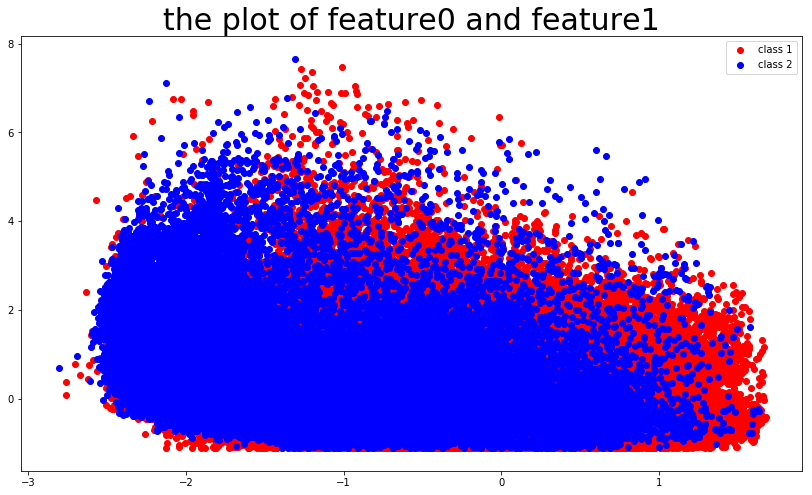

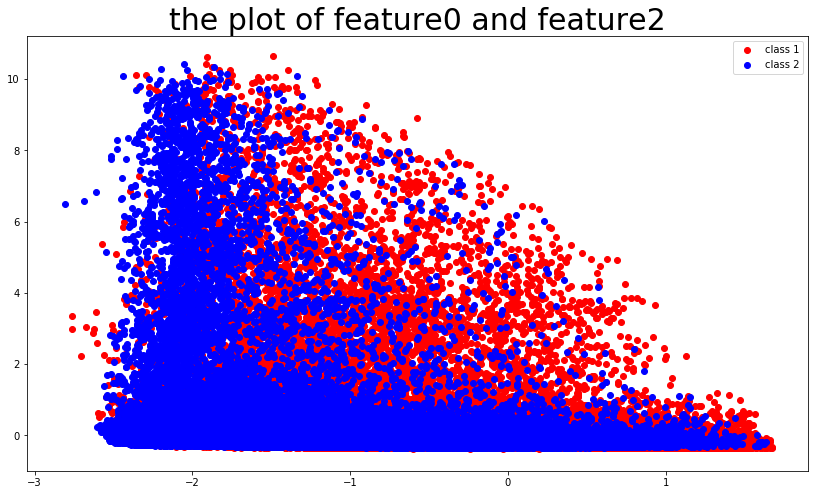

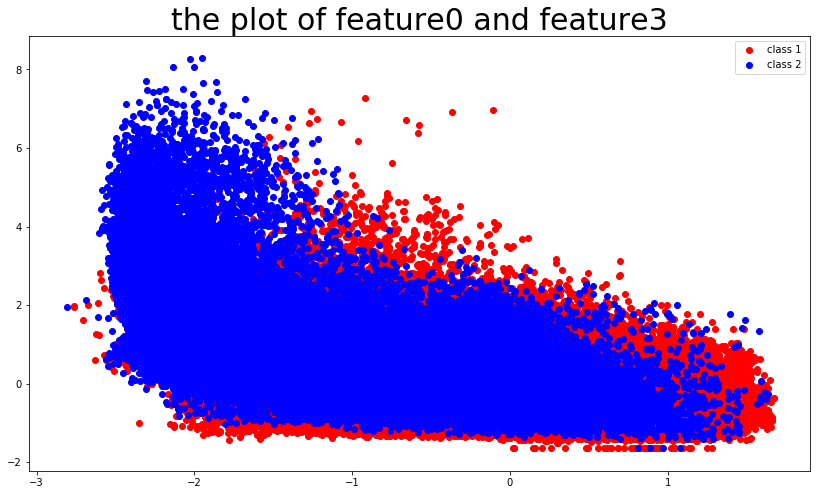

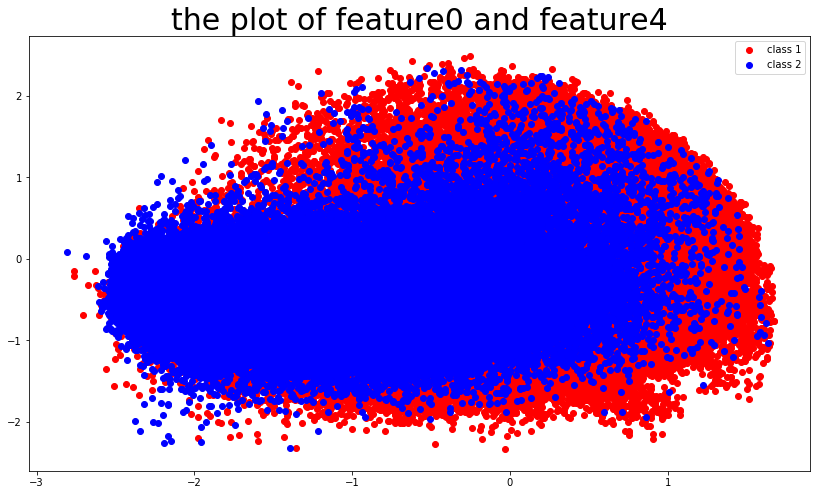

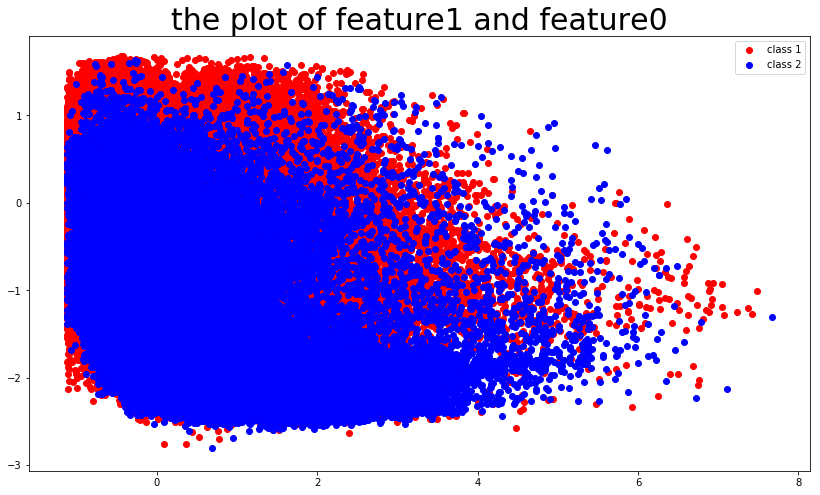

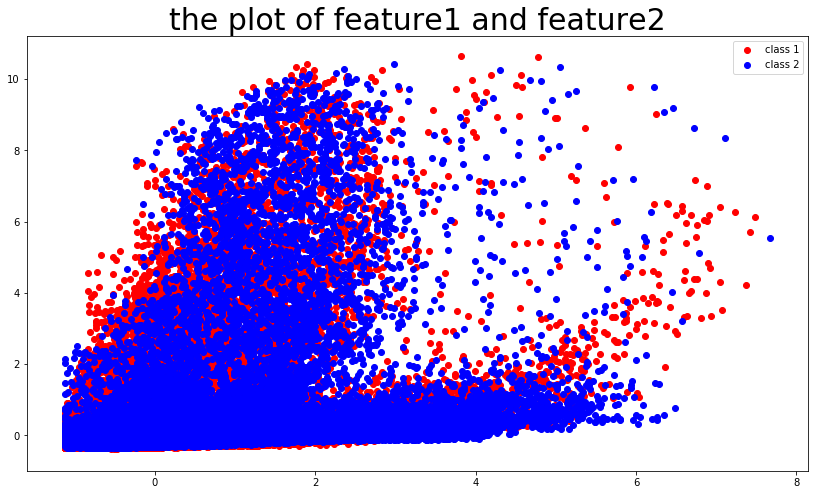

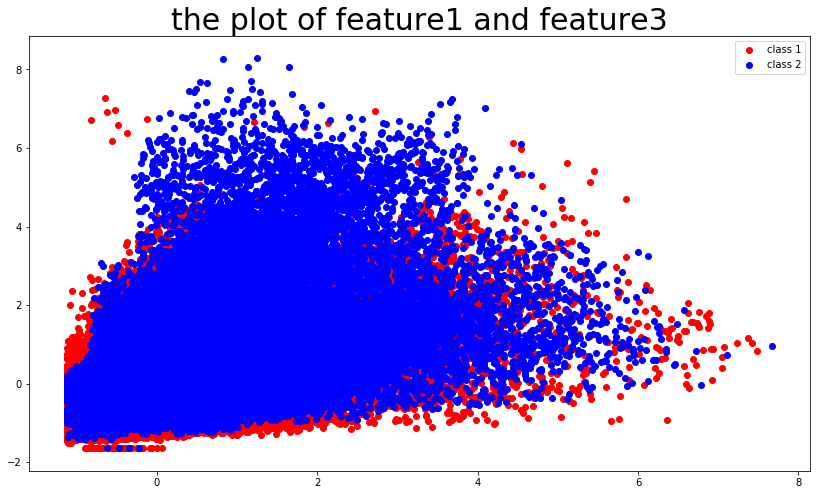

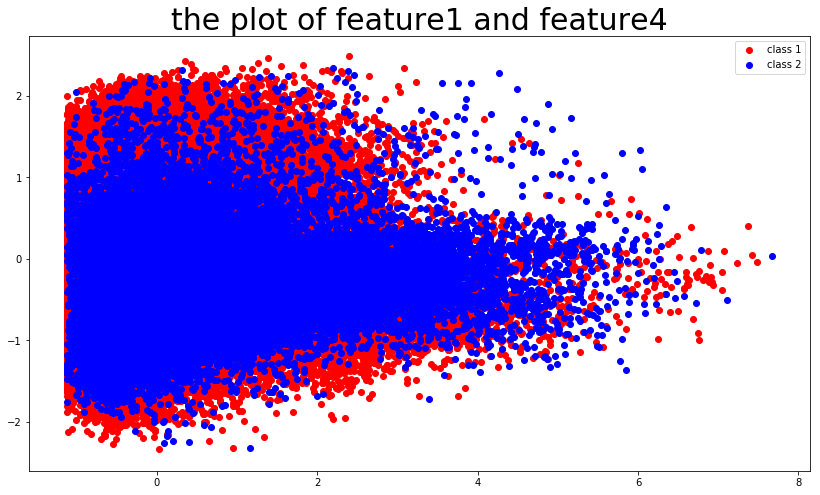

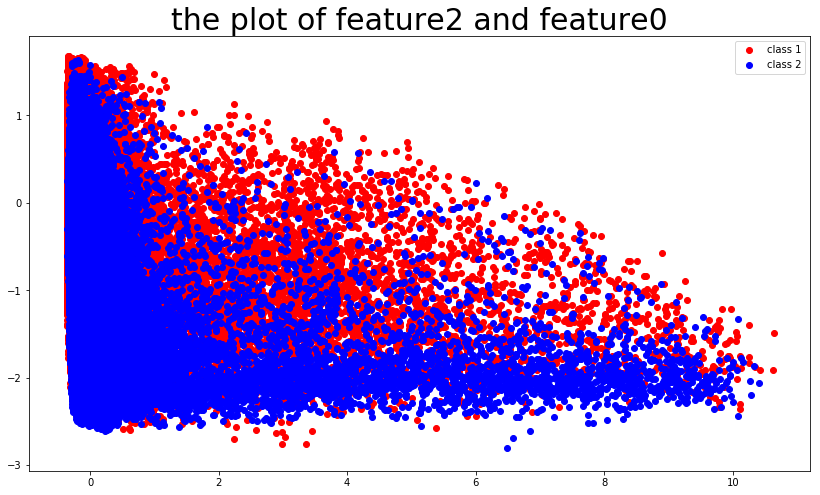

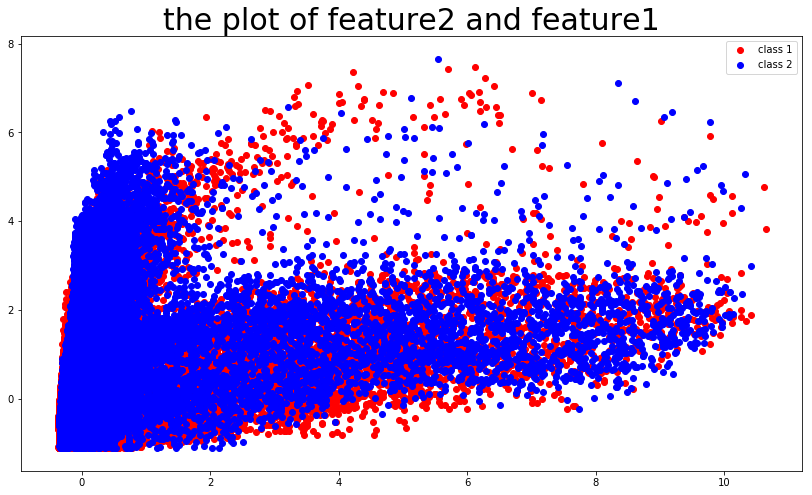

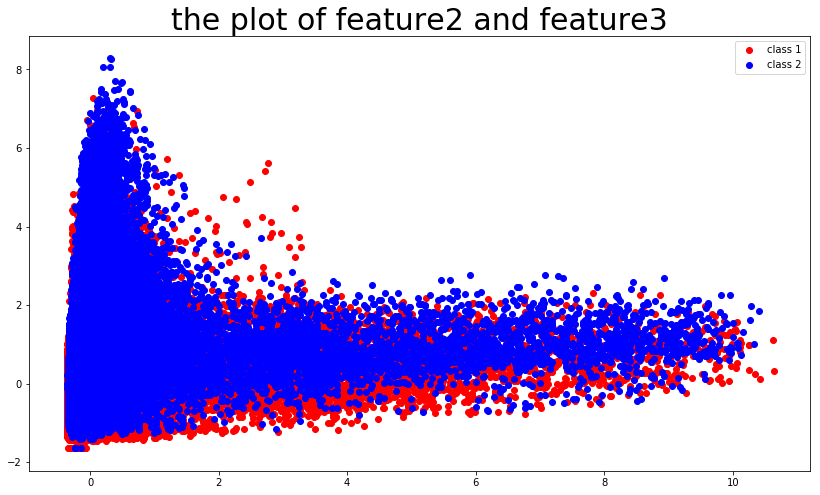

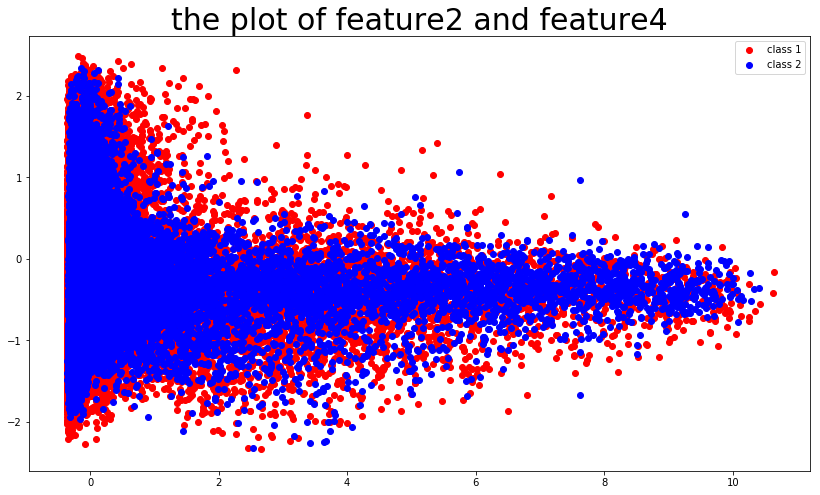

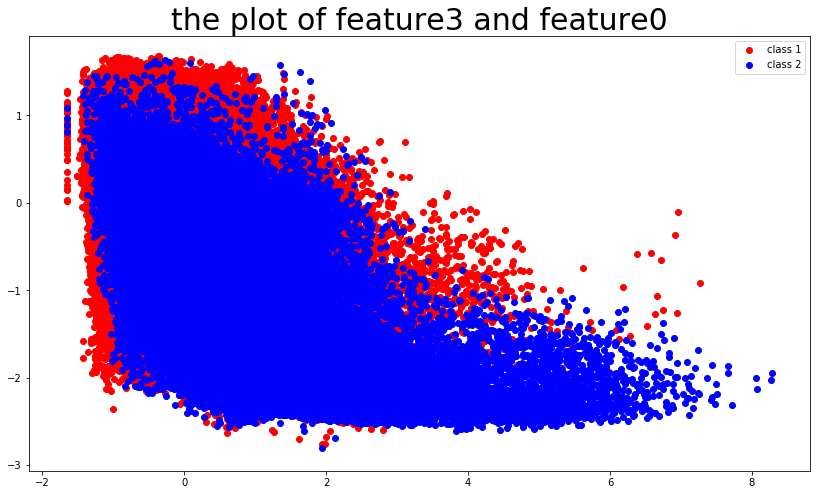

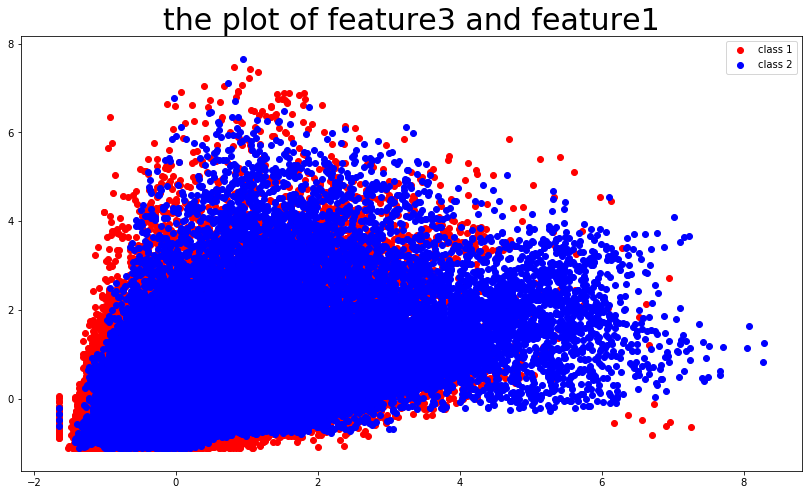

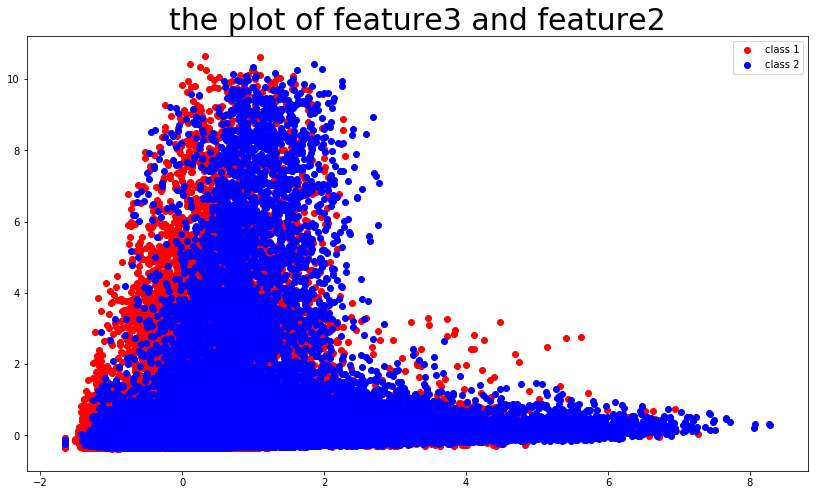

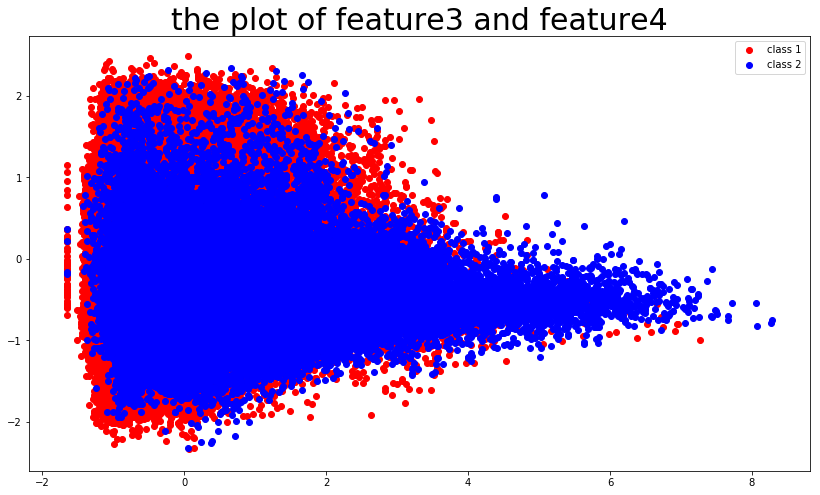

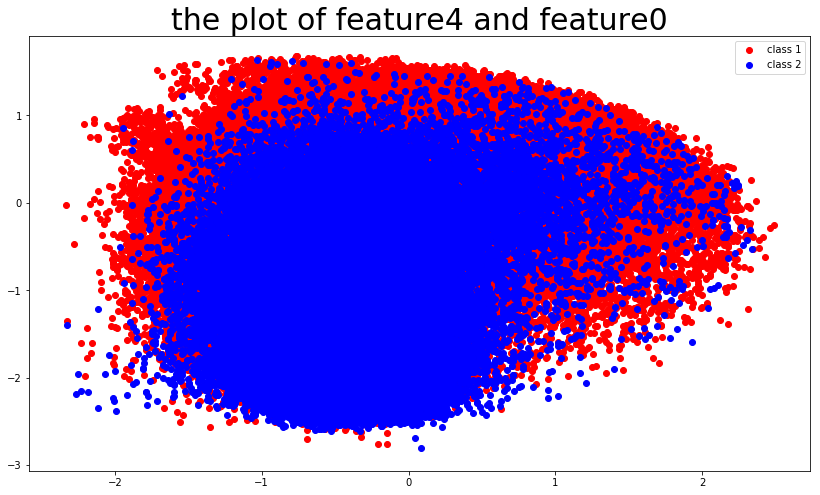

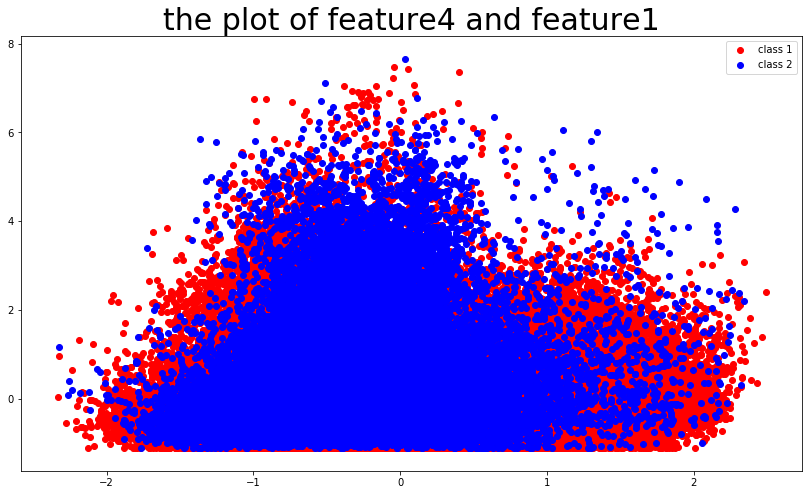

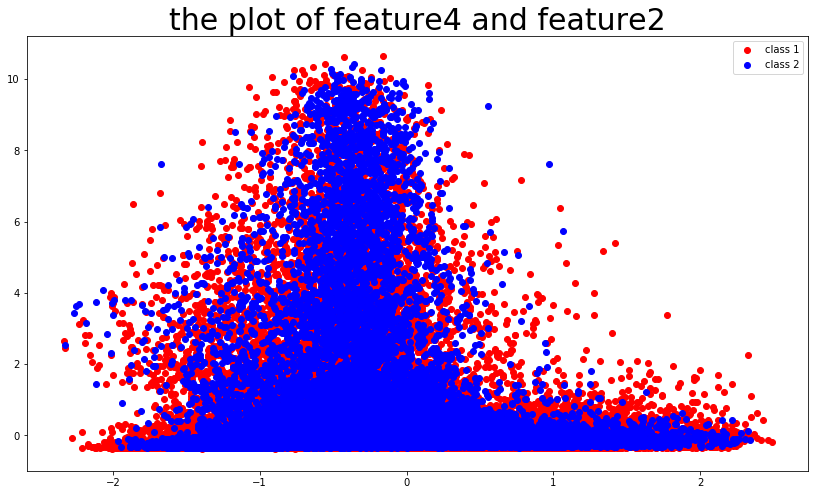

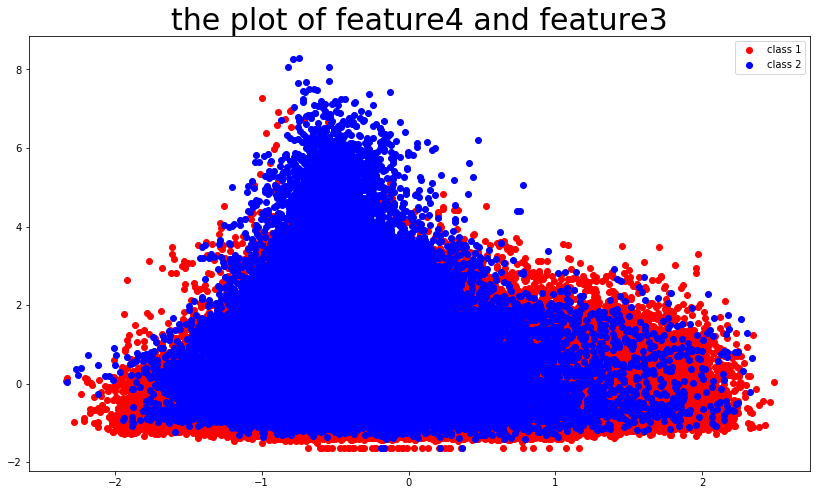

In [43]:
for feature1 in range(5):
    for feature2 in range(5):
        if feature1 == feature2:
            continue
        else:
            plot_label(feature1,feature2,X_train_1,X_train_2)